In [3]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../../scripts')) # if notebook in folder

import preprocessing_time_series as pts

os.chdir(pts.working_dir() + 'Feature_releases/release_v02/')

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('train_Queretaro de Arteaga.csv')
df.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Dev_uni_proxima,Log_Demanda,Log_Demanda_Mean_Producto_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,...,No_remains_Mean_Producto_ID_5,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_5,No_remains_Mean_Producto_ID_Ruta_SAK_5,Ordered_5,Ordered_Mean_Producto_ID_5,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_5,Ordered_Mean_Producto_ID_Ruta_SAK_5,Venta_hoy_5,Venta_hoy_by_uni_5,Venta_uni_hoy_5
0,1210,5,653039,395.0,0.00,NaN,0.0,5.981414,1.786475,5.712620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,7.0,6.356108,1.805728,6.137538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,0.0,5.411646,3.830277,3.830277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,0.0,3.713572,4.586806,4.586806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,0.0,5.209486,1.865367,5.206432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


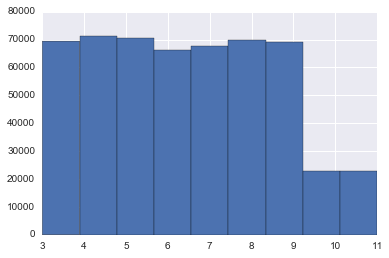

In [14]:
df.Semana.hist(bins=9)

In [20]:
# lag with n last weeks mean

lag_width = 2
indexers = [u'Semana', u'Agencia_ID', u'Canal_ID',
                u'Ruta_SAK', u'Cliente_ID', u'Producto_ID']

#only volumes are lagged
lag_columns = [x for x in df.columns if ('Demanda' in x) or ('No_remains' in x) or
                ('Venta' in x) or ('Dev_proxima' in x) or ('Ordered' in x)]

df_lagged = df.copy()

df_lag_lst = []
for lag in range(1, lag_width + 1):
    df_lag_part = df.copy()
    df_lag_part.Semana = df_lag_part.Semana + lag
    df_lag_part = df_lag_part.set_index(indexers)[lag_columns]
    df_lag_part.rename(columns=dict([(value, '%s_%dlast' % (value, lag_width)) for value in df_lag_part.columns]), inplace=True)
    df_lag_lst.append(df_lag_part.copy())
    
df_lag = pd.concat(df_lag_lst, axis=0)
        
df_lagged = pd.merge(df_lagged, df_lag, 'left', left_on=indexers, right_index=True)
print(lag_width, '-wide lag done')

2 -wide lag done


In [21]:
df_lagged.head()

,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Dev_uni_proxima,Log_Demanda,Log_Demanda_Mean_Producto_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,...,No_remains_Mean_Producto_ID_5_2last,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_5_2last,No_remains_Mean_Producto_ID_Ruta_SAK_5_2last,Ordered_5_2last,Ordered_Mean_Producto_ID_5_2last,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_5_2last,Ordered_Mean_Producto_ID_Ruta_SAK_5_2last,Venta_hoy_5_2last,Venta_hoy_by_uni_5_2last,Venta_uni_hoy_5_2last
0,1210,5,653039,395.0,0.00,NaN,0.0,5.981414,1.786475,5.712620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,7.0,6.356108,1.805728,6.137538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,0.0,5.411646,3.830277,3.830277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,0.0,3.713572,4.586806,4.586806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,0.0,5.209486,1.865367,5.206432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


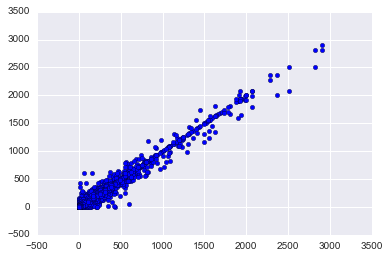

In [24]:
plt.scatter(df_lagged.Demanda_uni_equil_1, df_lagged.Demanda_uni_equil_2last)

In [25]:
df_lagged = df_lagged.set_index(indexers)

In [26]:
df_lagged.head()

Demanda_uni_equil  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                      
3      1210       5        3001     653039     1240                     395.0   
                                               1250                     575.0   
                                               1644                     223.0   
                                               2261                      40.0   
                                               4280                     182.0   

                                                            Dev_proxima  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                
3      1210       5        3001     653039     1240                0.00   
                                               1250               64.82   
                                               1644                0.00   
                                               2261                0.00   
                                               4280                0.00   

                                                            Dev_proxima_by_uni  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                       
3      1210       5        3001     653039     1240                        NaN   
                                               1250                       9.26   
                                               1644                        NaN   
                                               2261                        NaN   
                                               4280                        NaN   

                                                            Dev_uni_proxima  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                    
3      1210       5        3001     653039     1240                     0.0   
                                               1250                     7.0   
                                               1644                     0.0   
                                               2261                     0.0   
                                               4280                     0.0   

                                                            Log_Demanda  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                
3      1210       5        3001     653039     1240            5.981414   
                                               1250            6.356108   
                                               1644            5.411646   
                                               2261            3.713572   
                                               4280            5.209486   

                                                            Log_Demanda_Mean_Producto_ID  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                                 
3      1210       5        3001     653039     1240                             1.786475   
                                               1250                             1.805728   
                                               1644                             3.830277   
                                               2261                             4.586806   
                                               4280                             1.865367   

                                                            Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID  \
Semana Agencia_ID Canal_ID Ruta_SAK Cliente_ID Producto_ID                                                       
3      1210       5        3001     653039     1240                                                  5.712620    
                                               1250                                                  6.137538    
                                               1644                                                  3.830277    
                                               2261                                             

In [30]:
df_lagged.index.get_level_values(0)

Int64Index([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
            ...
            10, 11, 11, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name=u'Semana', length=731398)

In [35]:
df_lagged.index.loc[:,0]

AttributeError: 'MultiIndex' object has no attribute 'loc'

In [32]:
idx = pd.MultiIndex.from_tuples([(1, u'one'), (1, u'two'),
                                  (2, u'one'), (2, u'two')],
                                  names=['foo', 'bar'])
idx.set_levels([['a','b'], [1,2]])

idx

MultiIndex(levels=[[1, 2], [u'one', u'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'foo', u'bar'])

In [36]:
df = pd.read_csv('train_Queretaro de Arteaga.csv')
df.head()

,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Dev_uni_proxima,Log_Demanda,Log_Demanda_Mean_Producto_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,...,No_remains_Mean_Producto_ID_4last,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,No_remains_Mean_Producto_ID_Ruta_SAK_4last,Ordered_4last,Ordered_Mean_Producto_ID_4last,Ordered_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Ordered_Mean_Producto_ID_Ruta_SAK_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
0,1210,5,653039,395.0,0.00,NaN,0.0,5.981414,1.786475,5.712620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,7.0,6.356108,1.805728,6.137538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,0.0,5.411646,3.830277,3.830277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,0.0,3.713572,4.586806,4.586806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,0.0,5.209486,1.865367,5.206432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
(~df.isnull()).sum().sort_values()

Dev_proxima_by_uni_4                                            3078
Dev_proxima_by_uni_3                                            3935
Dev_proxima_by_uni_1                                            4913
Dev_proxima_by_uni_2                                            4995
Dev_proxima_by_uni_2last                                        8793
Dev_proxima_by_uni_3last                                       11431
Dev_proxima_by_uni_4last                                       13327
Dev_proxima_by_uni                                             15359
Venta_hoy_by_uni_4                                            128492
Venta_uni_hoy_4                                               128588
Dev_proxima_4                                                 128588
Log_Demanda_4                                                 128588
Log_Demanda_Mean_Producto_ID_4                                128588
Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4          128588
Log_Demanda_Mean_Producto_ID_Ruta_